<a href="https://colab.research.google.com/github/AbhianyAnumala/Multimodal-Media-Retrieval-and-Captioning-System/blob/feature_brnach/Dump_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1: Download the Flickr8K dataset.

You will get it from Kaggle.

After downloading check if you have around 8000 images and 40K around captions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr30k")

print("Path to dataset files:", path)

100%|██████████| 8.16G/8.16G [01:17<00:00, 114MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adityajn105/flickr30k/versions/1


In [ ]:
import os
import pandas as pd

# Path to the dataset directory
dataset_path = path
images_path = os.path.join(dataset_path, "Images")
captions_path = os.path.join(dataset_path, "captions.txt")

# List all image files
image_files = [os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.jpg')]
print(f"Found {len(image_files)} image files.")

# Load captions
captions_df = pd.read_csv(captions_path)
print(f"Loaded {len(captions_df)} captions.")
display(captions_df.head())

Found 31783 image files.
Loaded 158915 captions.


image                                            caption
0  1000092795.jpg   Two young guys with shaggy hair look at their...
1  1000092795.jpg   Two young , White males are outside near many...
2  1000092795.jpg   Two men in green shirts are standing in a yard .
3  1000092795.jpg       A man in a blue shirt standing in a garden .
4  1000092795.jpg            Two friends enjoy time spent together .

Task 2: Dump and save CLIP embeddings as .pt

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# Load model and processor once
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def get_image_clip_embedding(image_path):
    """Returns the CLIP embedding for an image."""
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    return outputs.squeeze().numpy()

def get_text_clip_embedding(text):
    """Returns the CLIP embedding for a text string."""
    inputs = processor(text=[text], return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_text_features(**inputs)
    return outputs.squeeze().numpy()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
embedding = get_image_clip_embedding("/kaggle/input/flickr8k/Images/2623982903_58ec7c5026.jpg")
print(f"Sample embedding from {embedding}:")

Sample embedding from [-1.73680067e-01  1.73960745e-01  1.33024156e-02  3.47078264e-01
  1.56051025e-01  1.68752730e-01  2.31886879e-01 -1.63383603e-01
  5.94567895e-01  3.99735987e-01 -2.22359419e-01 -3.70779306e-01
  6.29652977e-01 -1.24984056e-01 -6.59757629e-02  3.34235728e-02
  5.00085205e-02 -4.62665483e-02 -6.34478703e-02 -1.93770692e-01
 -9.07488227e-01  1.76283926e-01  4.36947227e-01  1.34407692e-02
 -1.68922484e-01  2.07825541e-01 -3.98755789e-01  2.78199285e-01
  2.49129921e-01 -3.35465819e-01  1.30729377e-01 -1.46874070e-01
  2.44827420e-01  2.31119245e-02  2.57832929e-02  2.72938192e-01
  4.28333014e-01  3.57451886e-01  5.41597724e-01  1.52173042e+00
  4.12514925e-01  4.22896147e-01 -3.22921872e-01  1.40287071e-01
 -1.09533869e-01 -1.08502603e+00  1.25076979e-01 -1.61000431e-01
  2.14947402e-01  7.77600288e-01 -1.04381949e-01  4.60463911e-01
  4.00359705e-02  3.90495390e-01 -1.89424455e-01  3.44357759e-01
  4.82850254e-01 -1.81773424e-01 -4.93946895e-02 -4.04853761e-01
  4

In [ ]:
print(f"Sample embedding from {embedding.shape}:")

Sample embedding from (512,):


In [ ]:
import torch
import os

# Create a directory to save image embeddings
image_embeddings_dir = "image_embeddings"
os.makedirs(image_embeddings_dir, exist_ok=True)

for image_file in image_files:
    try:
        # Get the image name without the path and extension
        image_name = os.path.basename(image_file).split('.')[0]
        embedding = get_image_clip_embedding(image_file)
        # Save the embedding as a .pt file
        torch.save(torch.tensor(embedding), os.path.join(image_embeddings_dir, f"{image_name}.pt"))
    except Exception as e:
        print(f"Error processing image {image_file}: {e}")

print(f"Saved image embeddings to {image_embeddings_dir}")

Saved image embeddings to image_embeddings


In [ ]:
# prompt: print one embedding

# Load and print one embedding
if image_embeddings_dir:
  embedding_files = [f for f in os.listdir(image_embeddings_dir) if f.endswith('.pt')]
  if embedding_files:
    sample_embedding_file = embedding_files[0]
    sample_embedding_path = os.path.join(image_embeddings_dir, sample_embedding_file)
    sample_embedding = torch.load(sample_embedding_path)
    print(f"Sample embedding from {sample_embedding_file}:")
    print(sample_embedding)
  else:
    print("No embedding files found in the image_embeddings_dir.")
else:
  print("Image embeddings directory was not created or found.")

Sample embedding from 2276120079_4f235470bc.pt:
tensor([ 2.5642e-01, -3.8413e-02,  7.1078e-02,  4.6050e-01,  2.1490e-01,
         1.3612e-01,  4.2245e-01, -1.7801e-01, -3.1655e-01, -3.1542e-01,
         1.8718e-01,  1.7434e-01, -5.9120e-01, -1.5686e-01,  5.4775e-01,
        -1.6886e-01, -5.8991e-01,  8.0129e-03,  1.5581e-01, -4.9620e-01,
        -2.6970e-01,  1.3356e-01,  1.2836e-01, -1.5394e-01, -2.1612e-01,
         2.6462e-01, -5.7245e-01, -1.1711e-01, -4.7586e-01, -2.7098e-01,
         1.7863e-01,  5.1626e-01,  7.5327e-02, -3.0484e-01, -3.2388e-01,
        -7.7542e-02,  2.6812e-03,  2.5806e-01, -1.2608e-01, -7.0570e-01,
        -6.2944e-01,  4.7188e-03,  5.1675e-02, -4.4146e-02,  2.4121e-02,
        -2.6587e-01,  5.0004e-01, -2.9206e-01,  7.2030e-01,  9.7171e-02,
        -1.4869e-01,  3.1496e-01,  5.4760e-03,  3.5707e-01, -2.0271e-01,
        -3.0897e-01,  1.0395e-01, -3.5687e-01,  1.3098e-01, -3.5687e-03,
         5.0744e-01, -1.6327e-01,  1.7925e-01, -1.4280e-01, -1.9215e-01,
   

In [ ]:
# prompt: get dimen of this embedding

print(f"Dimension of the sample embedding: {sample_embedding.shape}")

Dimension of the sample embedding: torch.Size([512])


In [ ]:
# Example: Copy a folder named 'my_results' from Colab's content directory to your Drive
!cp -r /content/image_embeddings/ /content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_image_embeddings_8k

In [ ]:
import torch
import os

# Create a directory to save text embeddings
text_embeddings_dir = "text_embeddings"
os.makedirs(text_embeddings_dir, exist_ok=True)

# We will group captions by image to save them together
for image_name, group in captions_df.groupby('image'):
    # Get the image name without the extension for the filename
    image_name_base = image_name.split('.')[0]
    i = 0
    for caption in group['caption']:
      i += 1
      try:
        embedding = get_text_clip_embedding(caption)
        torch.save(torch.tensor(embedding), os.path.join(text_embeddings_dir, f"{image_name_base}@{str(i)}.pt"))
        print(f"processing caption for image",f"{image_name_base}@{str(i)}.pt")
      except Exception as e:
        print(f"Error processing caption '{caption}' for image {image_name}: {e}")
print(f"Saved text embeddings to {text_embeddings_dir}")

Streaming output truncated to the last 5000 lines.
processing caption for image 378453580_21d688748e@2.pt
processing caption for image 378453580_21d688748e@3.pt
processing caption for image 378453580_21d688748e@4.pt
processing caption for image 378453580_21d688748e@5.pt
processing caption for image 379006645_b9a2886b51@1.pt
processing caption for image 379006645_b9a2886b51@2.pt
processing caption for image 379006645_b9a2886b51@3.pt
processing caption for image 379006645_b9a2886b51@4.pt
processing caption for image 379006645_b9a2886b51@5.pt
processing caption for image 380034515_4fbdfa6b26@1.pt
processing caption for image 380034515_4fbdfa6b26@2.pt
processing caption for image 380034515_4fbdfa6b26@3.pt
processing caption for image 380034515_4fbdfa6b26@4.pt
processing caption for image 380034515_4fbdfa6b26@5.pt
processing caption for image 380041023_0dfd712ef1@1.pt
processing caption for image 380041023_0dfd712ef1@2.pt
processing caption for image 380041023_0dfd712ef1@3.pt
processing cap

In [ ]:
# Copy text embeddings
!cp -r /content/text_embeddings/ /content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_text_embeddings_8k

#WEEK2

In [ ]:
# embedding similiarity
# image to text
# text to image

In [ ]:
import torch
from sklearn.metrics.pairwise import cosine_similarity
import os

# Load a sample image embedding and a sample text embedding
# Replace with the actual paths to your saved embeddings
sample_image_embedding_path = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_image_embeddings/1000268201_693b08cb0e.pt"
sample_text_embedding_path = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_text_embeddings/1000268201_693b08cb0e.pt"

# Load the embeddings
try:
    image_embedding = torch.load(sample_image_embedding_path)
    # Assuming the text embeddings for an image are saved as a list/tensor of embeddings
    text_embeddings = torch.load(sample_text_embedding_path)

    # If text_embeddings is a list of embeddings, you might want to compare the image embedding
    # with each text embedding or a combined representation (e.g., average)
    # For simplicity, let's compare with the first text embedding in the list
    if text_embeddings.ndim > 1:
        first_text_embedding = text_embeddings[0]
    else:
        first_text_embedding = text_embeddings # If there's only one text embedding

    # Reshape for cosine similarity calculation if needed (should be 2D arrays)
    image_embedding_reshaped = image_embedding.reshape(1, -1)
    first_text_embedding_reshaped = first_text_embedding.reshape(1, -1)

    # Calculate cosine similarity
    similarity_score = cosine_similarity(image_embedding_reshaped, first_text_embedding_reshaped)

    print(f"Cosine similarity between sample image and first text embedding: {similarity_score[0][0]}")

except FileNotFoundError:
    print("Make sure the sample embedding files exist at the specified paths.")
except Exception as e:
    print(f"An error occurred: {e}")

Cosine similarity between sample image and first text embedding: 0.33078238368034363


# Task
Implement a text-to-image search functionality using CLIP embeddings and cosine similarity.

## Load embeddings

### Subtask:
Load all the saved image and text embeddings into memory. You might want to organize them in a way that allows for easy lookup, e.g., dictionaries mapping image names to embeddings.


**Reasoning**:
Initialize empty dictionaries and load image and text embeddings from the saved files into these dictionaries.



In [ ]:
import os
import torch

# Define the directories where embeddings are saved
image_embeddings_dir = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_image_embeddings"
text_embeddings_dir = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_text_embeddings"

# Determine the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create dictionaries to store embeddings
image_embeddings_dict = {}
text_embeddings_dict = {}

# Load image embeddings
print("Loading image embeddings...")
for filename in os.listdir(image_embeddings_dir):
    if filename.endswith(".pt"):
        image_name = os.path.splitext(filename)[0]
        filepath = os.path.join(image_embeddings_dir, filename)
        try:
            # Load the embedding and move it to the specified device
            embedding = torch.load(filepath).to(device)
            image_embeddings_dict[image_name] = embedding
        except Exception as e:
            print(f"Error loading image embedding {filename}: {e}")

print(f"Loaded {len(image_embeddings_dict)} image embeddings.")

# Load text embeddings
print("Loading text embeddings...")
for filename in os.listdir(text_embeddings_dir):
    if filename.endswith(".pt"):
        # Assuming the filename format is image_name@caption_number.pt
        parts = os.path.splitext(filename)[0].split('@')
        if len(parts) == 2:
            image_name_base = parts[0]
            filepath = os.path.join(text_embeddings_dir, filename)
            try:
                # Load the embedding and move it to the specified device
                embedding = torch.load(filepath).to(device)
                if image_name_base not in text_embeddings_dict:
                    text_embeddings_dict[image_name_base] = []
                text_embeddings_dict[image_name_base].append(embedding)
            except Exception as e:
                print(f"Error loading text embedding {filename}: {e}")
        else:
             print(f"Skipping text embedding file with unexpected format: {filename}")


print(f"Loaded text embeddings for {len(text_embeddings_dict)} images.")

Loading image embeddings...
Loaded 8091 image embeddings.
Loading text embeddings...
Loaded 8091 text embeddings.


## Implement text-to-image search function

### Subtask:
Create a function that takes a text query as input, generates its CLIP embedding, and then calculates the cosine similarity between the text embedding and all the image embeddings.


**Reasoning**:
Define the `text_to_image_search` function to generate the text embedding and calculate cosine similarity with all image embeddings.



In [ ]:
def text_to_image_search(text_query, image_embeddings_dict):
    """
    Performs text-to-image search using CLIP embeddings and cosine similarity.

    Args:
        text_query (str): The text query string.
        image_embeddings_dict (dict): A dictionary mapping image names to their CLIP embeddings.

    Returns:
        dict: A dictionary mapping image names to their cosine similarity scores with the text query.
    """
    # Generate CLIP embedding for the text query
    text_embedding = get_text_clip_embedding(text_query)

    # Initialize dictionary to store similarity scores
    similarity_scores = {}

    # Reshape text embedding for cosine similarity calculation
    text_embedding_reshaped = text_embedding.reshape(1, -1)

    # Iterate through image embeddings and calculate similarity
    for image_name, image_embedding in image_embeddings_dict.items():
        # Reshape image embedding for cosine similarity calculation
        image_embedding_reshaped = image_embedding.reshape(1, -1)

        # Calculate cosine similarity
        score = cosine_similarity(text_embedding_reshaped, image_embedding_reshaped)[0][0]

        # Store the similarity score
        similarity_scores[image_name] = score

    return similarity_scores

Function text_to_image_search defined.


## Retrieve top results

### Subtask:
Based on the similarity scores, retrieve and display the top N images that are most similar to the text query.


**Reasoning**:
Define the function `get_top_n_images` to retrieve the top N images based on similarity scores.



In [ ]:
def get_top_n_images(similarity_scores, n=5):
    """
    Retrieves the top N image names based on cosine similarity scores.

    Args:
        similarity_scores (dict): A dictionary mapping image names to their similarity scores.
        n (int): The number of top images to retrieve. Defaults to 5.

    Returns:
        list: A list of image names with the top N similarity scores.
    """
    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True)

    # Select the top n items
    top_n_items = sorted_scores[:n]

    # Extract the image names
    top_n_image_names = [item[0] for item in top_n_items]

    return top_n_image_names

print("Function get_top_n_images defined.")

Function get_top_n_images defined.


## Test the search function

### Subtask:
Test the implemented text-to-image search function with a few sample text queries to ensure it works as expected.


**Reasoning**:
Test the implemented text-to-image search function with a few sample text queries to ensure it works as expected.



Searching for: 'A dog playing in the grass'
Top 5 images:


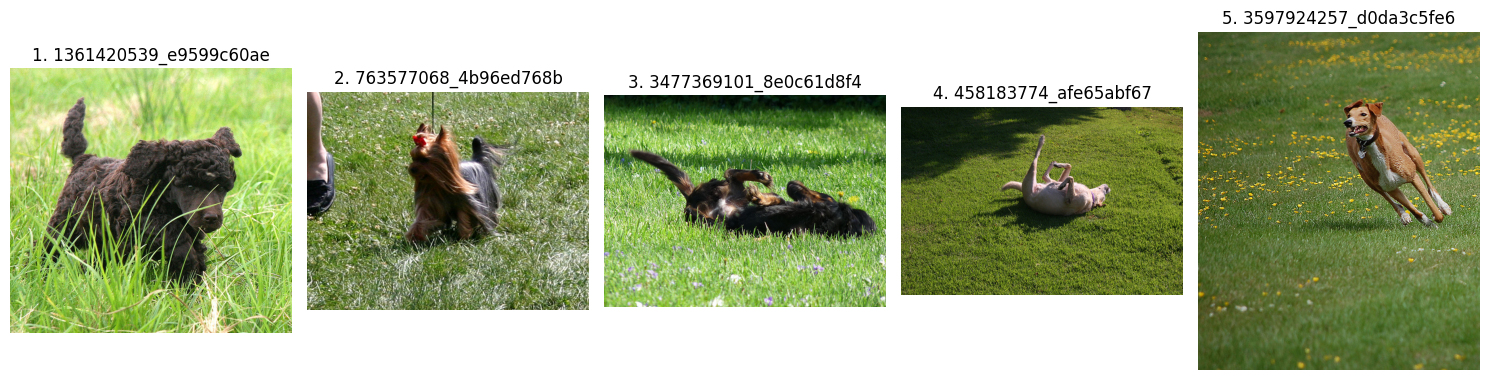

--------------------
Searching for: 'A group of people walking on the beach'
Top 5 images:


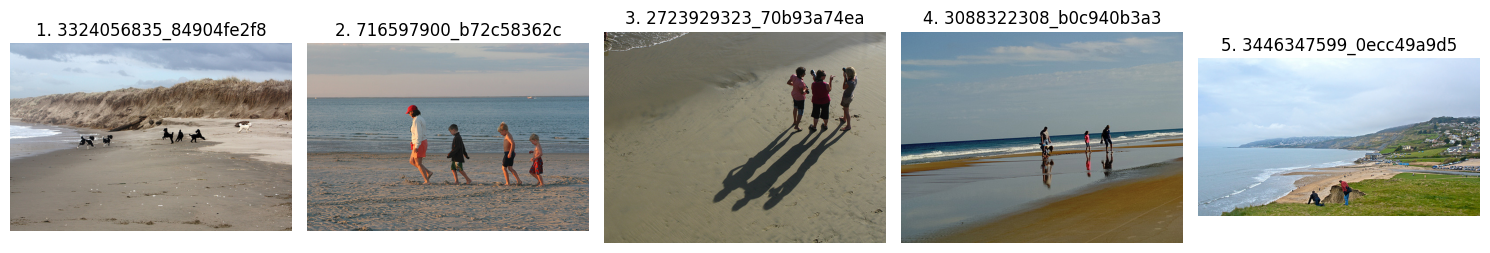

--------------------
Searching for: 'A red car driving on a road'
Top 5 images:


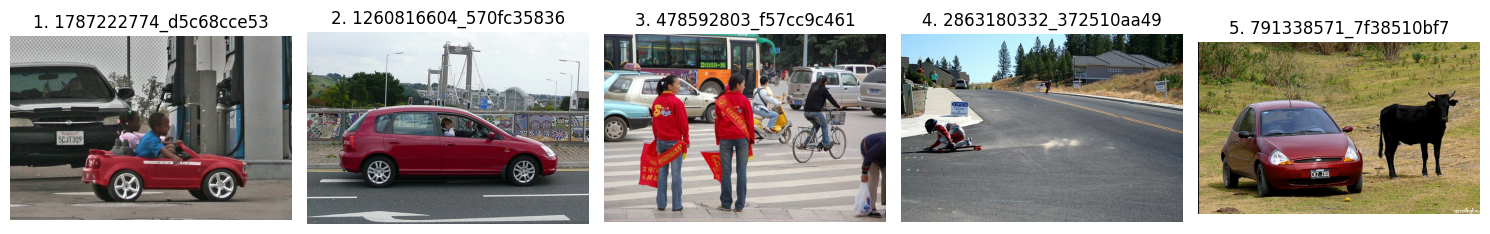

--------------------


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt


# Define sample text queries
sample_queries = [
    "A dog playing in the grass",
    "A group of people walking on the beach",
    "A red car driving on a road"
]

# Define the number of top images to retrieve
top_n = 5

# Path to the original images
images_dir = "/kaggle/input/flickr8k/Images"

# Test the text-to-image search for each query
for query in sample_queries:
    print(f"Searching for: '{query}'")
    # Perform the search
    similarity_scores = text_to_image_search(query, image_embeddings_dict)

    # Get the top N image names
    top_image_names = get_top_n_images(similarity_scores, top_n)

    # Print the results and display images
    print(f"Top {top_n} images:")
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(top_image_names):
        image_path = os.path.join(images_dir, f"{image_name}.jpg")
        try:
            img = Image.open(image_path)
            plt.subplot(1, top_n, i + 1)
            plt.imshow(img)
            plt.title(f"{i+1}. {image_name}")
            plt.axis("off")
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
        except Exception as e:
            print(f"Error displaying image {image_name}: {e}")
    plt.tight_layout()
    plt.show()
    print("-" * 20)

## Implement Text-to-Text Search Function

### Subtask:
Create a function that takes a text query as input, generates its CLIP embedding, and then calculates the cosine similarity between the text embedding and all the text embeddings.

**Reasoning**:
Define the `text_to_text_search` function to generate the text embedding for the query and calculate cosine similarity with all stored text embeddings.

In [ ]:
def text_to_text_search(text_query, text_embeddings_dict):
    """
    Performs text-to-text search using CLIP embeddings and cosine similarity.

    Args:
        text_query (str): The text query string.
        text_embeddings_dict (dict): A dictionary mapping image names to their corresponding text embeddings (list/tensor of embeddings).

    Returns:
        dict: A dictionary mapping image names to the maximum cosine similarity score between the text query and any of the captions for that image.
    """
    # Generate CLIP embedding for the text query
    text_embedding = get_text_clip_embedding(text_query)

    # Initialize dictionary to store similarity scores
    similarity_scores = {}

    # Reshape text embedding for cosine similarity calculation
    text_embedding_reshaped = text_embedding.reshape(1, -1)

    # Iterate through the text embeddings dictionary
    for image_name, embeddings_list in text_embeddings_dict.items():
        if embeddings_list is not None and len(embeddings_list) > 0:
            # Calculate cosine similarity between the query embedding and all embeddings for this image
            # We will take the maximum similarity score as the score for this image
            max_similarity = -1
            for caption_embedding in embeddings_list:
                 if caption_embedding is not None: # Check if individual caption embedding is not None
                    caption_embedding_reshaped = caption_embedding.reshape(1, -1)
                    score = cosine_similarity(text_embedding_reshaped, caption_embedding_reshaped)[0][0]
                    max_similarity = max(max_similarity, score)
            similarity_scores[image_name] = max_similarity
        else:
            similarity_scores[image_name] = -1 # Assign a low score if no valid embeddings

    return similarity_scores

## Retrieve Top Text Results

### Subtask:
Based on the similarity scores from the text-to-text search, retrieve and display the top N most similar text captions.

**Reasoning**:
Define the function `get_top_n_text_results` to retrieve the top N text results based on similarity scores and display the corresponding captions.

In [ ]:
def get_top_n_text_results(similarity_scores, captions_df, n=5):
    """
    Retrieves the top N image names and their corresponding captions based on text-to-text similarity scores.

    Args:
        similarity_scores (dict): A dictionary mapping image names to their similarity scores.
        captions_df (pd.DataFrame): The DataFrame containing image names and captions.
        n (int): The number of top results to retrieve. Defaults to 5.

    Returns:
        list: A list of tuples, where each tuple contains (image_name, caption, similarity_score) for the top N results.
    """
    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True)

    # Select the top n items
    top_n_items = sorted_scores[:n]

    # Retrieve the corresponding captions for the top images
    top_n_results = []
    for image_name, score in top_n_items:
        # Find all captions for this image
        image_captions = captions_df[captions_df['image'] == f"{image_name}.jpg"]['caption'].tolist()
        # For simplicity, we'll just add the first caption found for this image
        # You might want to add all captions or the one with the highest individual similarity if you calculated that.
        if image_captions:
            top_n_results.append((image_name, image_captions[0], score))
        else:
            top_n_results.append((image_name, "No caption found", score)) # Handle cases with no captions

    return top_n_results

Function get_top_n_text_results defined.


## Test the Text-to-Text Search Function

### Subtask:
Test the implemented text-to-text search function with a few sample text queries.

**Reasoning**:
Test the implemented text-to-text search function with a few sample text queries and display the top results.

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import os
import pandas as pd

captions_path = "/kaggle/input/flickr8k/captions.txt"
captions_df = pd.read_csv(captions_path)

# Define sample text queries for text-to-text search
sample_text_queries = [
    "A person riding a bicycle",
    "A dog running in the snow",
    "A boat on the water"
]

# Define the number of top text results to retrieve
top_n_text = 5

# Test the text-to-text search for each query
for query in sample_text_queries:
    print(f"Searching for similar captions to: '{query}'")
    # Perform the text-to-text search
    similarity_scores_text = text_to_text_search(query, text_embeddings_dict)

    # Get the top N text results
    top_text_results = get_top_n_text_results(similarity_scores_text, captions_df, top_n_text)

    # Print the results
    print(f"Top {top_n_text} similar captions:")
    for i, (image_name, caption, score) in enumerate(top_text_results):
        print(f"{i+1}. Image: {image_name}, Caption: \"{caption}\" (Similarity: {score:.4f})")
    print("-" * 20)

Searching for similar captions to: 'A person riding a bicycle'
Top 5 similar captions:
1. Image: 3527261343_efa07ea596, Caption: "A male does an open leg trick while doing a wheelie on his bike ." (Similarity: 0.9591)
2. Image: 2084217208_7bd9bc85e5, Caption: "A person in a blue jacket , wearing a bicycle helmet is riding a bike" (Similarity: 0.9411)
3. Image: 2980118787_2099de53ec, Caption: "A boy makes a jump with a dirt bike with the sun setting behind him ." (Similarity: 0.9287)
4. Image: 3594822096_e1144b85d6, Caption: "A biker moving quickly past trees ." (Similarity: 0.9248)
5. Image: 3522076584_7c603d2ac5, Caption: "a biker performs a trick in the air ." (Similarity: 0.9243)
--------------------
Searching for similar captions to: 'A dog running in the snow'
Top 5 similar captions:
1. Image: 3407317539_68765a3375, Caption: "A black and white dog is running across a snow covered field ." (Similarity: 0.9901)
2. Image: 3212456649_40a3052682, Caption: "A brown dog jumps over the de

## Implement Image-to-Image Search Function

### Subtask:
Create a function that takes an image query (either an image file path or an image embedding) as input and calculates the cosine similarity between its embedding and all other image embeddings.

**Reasoning**:
Define the `image_to_image_search` function to take an image query and calculate its similarity with all other image embeddings.

In [ ]:
def image_to_image_search(image_query, image_embeddings_dict, top_n=5):
    """
    Performs image-to-image search using CLIP embeddings and cosine similarity.

    Args:
        image_query (str or np.ndarray): The image query. Can be an image file path or a pre-computed image embedding (numpy array).
        image_embeddings_dict (dict): A dictionary mapping image names to their CLIP embeddings.
        top_n (int): The number of top similar images to retrieve. Defaults to 5.

    Returns:
        list: A list of tuples, where each tuple contains (image_name, similarity_score) for the top N similar images.
    """
    # Get the embedding for the image query
    if isinstance(image_query, str):
        # If the query is a file path, generate the embedding
        query_embedding = get_image_clip_embedding(image_query)
    elif isinstance(image_query, torch.Tensor):
        # If the query is a pre-computed embedding (tensor), convert to numpy
        query_embedding = image_query.numpy()
    else:
        raise ValueError("image_query must be a file path (str) or a torch.Tensor embedding.")


    # Initialize dictionary to store similarity scores
    similarity_scores = {}

    # Reshape query embedding for cosine similarity calculation
    query_embedding_reshaped = query_embedding.reshape(1, -1)

    # Iterate through all image embeddings and calculate similarity
    for image_name, image_embedding in image_embeddings_dict.items():
        # Ensure image_embedding is a numpy array
        if isinstance(image_embedding, torch.Tensor):
            image_embedding_np = image_embedding.numpy()
        else:
            image_embedding_np = image_embedding # Assuming it's already a numpy array

        # Reshape image embedding for cosine similarity calculation
        image_embedding_reshaped = image_embedding_np.reshape(1, -1)

        # Calculate cosine similarity
        score = cosine_similarity(query_embedding_reshaped, image_embedding_reshaped)[0][0]

        # Store the similarity score
        similarity_scores[image_name] = score

    # Sort the similarity scores in descending order and get the top N
    sorted_scores = sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True)

    # Exclude the query image itself from the results if it's in the dictionary
    # Assuming the query image name can be inferred if query is a path
    if isinstance(image_query, str):
         query_image_name = os.path.splitext(os.path.basename(image_query))[0]
         top_n_results = [(name, score) for name, score in sorted_scores if name != query_image_name][:top_n]
    else:
        # If query is an embedding, we can't easily exclude the original image
        # This would require mapping embedding back to image name, which is not straightforward
        top_n_results = sorted_scores[:top_n]


    return top_n_results

print("Function image_to_image_search defined.")

Function image_to_image_search defined.


## Retrieve Top Image Results

### Subtask:
Based on the similarity scores from the image-to-image search, retrieve and display the top N most similar images.

**Reasoning**:
Define the function `display_top_n_images` to display the top N images based on the results from the image-to-image search.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_top_n_images(top_image_results, images_dir):
    """
    Displays the top N images based on the image search results.

    Args:
        top_image_results (list): A list of tuples, where each tuple contains (image_name, similarity_score).
        images_dir (str): The directory where the images are stored.
    """
    print(f"Top {len(top_image_results)} similar images:")
    plt.figure(figsize=(15, 5))
    for i, (image_name, score) in enumerate(top_image_results):
        image_path = os.path.join(images_dir, f"{image_name}.jpg")
        try:
            img = Image.open(image_path)
            plt.subplot(1, len(top_image_results), i + 1)
            plt.imshow(img)
            plt.title(f"{i+1}. {image_name}\nSimilarity: {score:.4f}")
            plt.axis("off")
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
        except Exception as e:
            print(f"Error displaying image {image_name}: {e}")
    plt.tight_layout()
    plt.show()

print("Function display_top_n_images defined.")

Function display_top_n_images defined.


## Test the Image-to-Image Search Function

### Subtask:
Test the implemented image-to-image search function with a few sample image queries.

**Reasoning**:
Test the implemented image-to-image search function with a few sample image queries and display the top results.

Searching for similar images to: 381514859_b40418d9c3.jpg
Top 5 similar images:


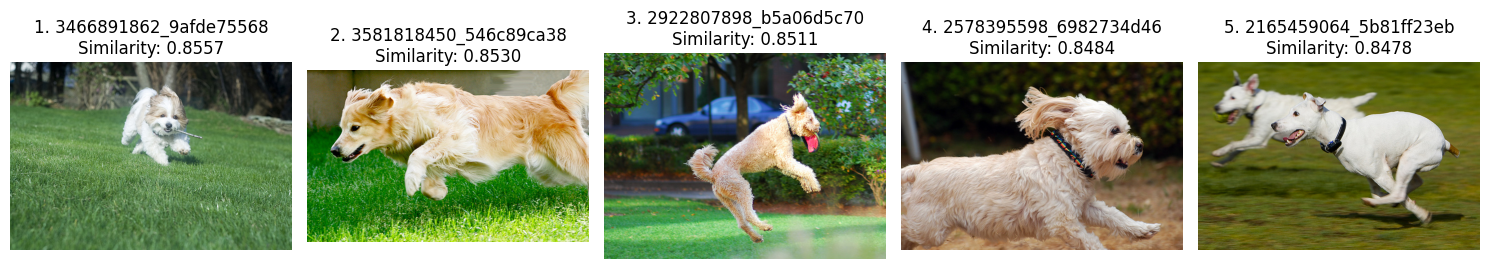

--------------------
Searching for similar images to: 3222041930_f642f49d28.jpg
Top 5 similar images:


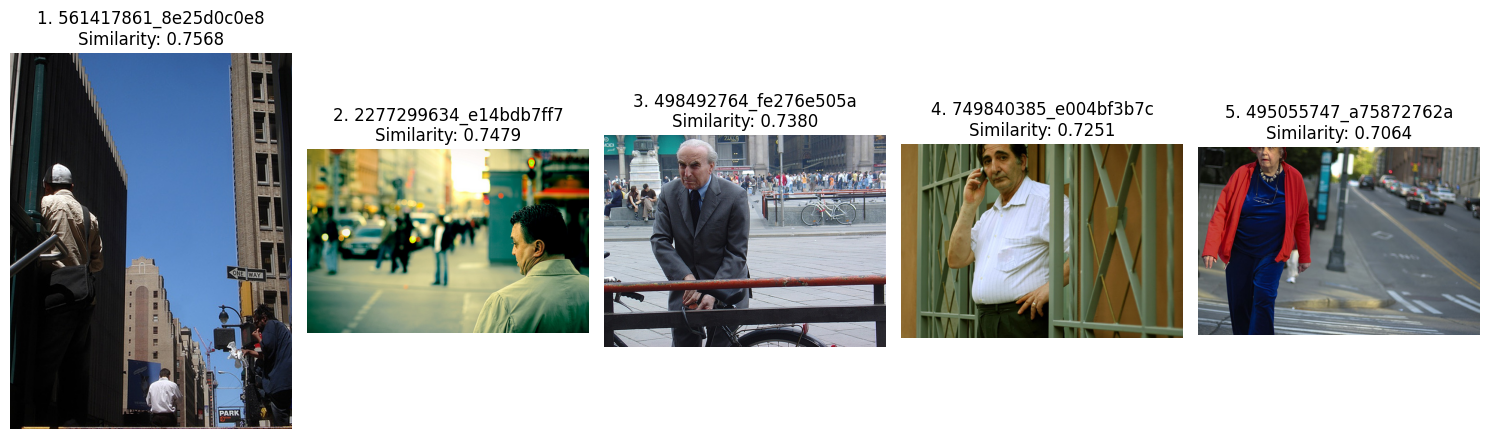

--------------------
Searching for similar images to: 3286620180_4b00e93e8e.jpg
Top 5 similar images:


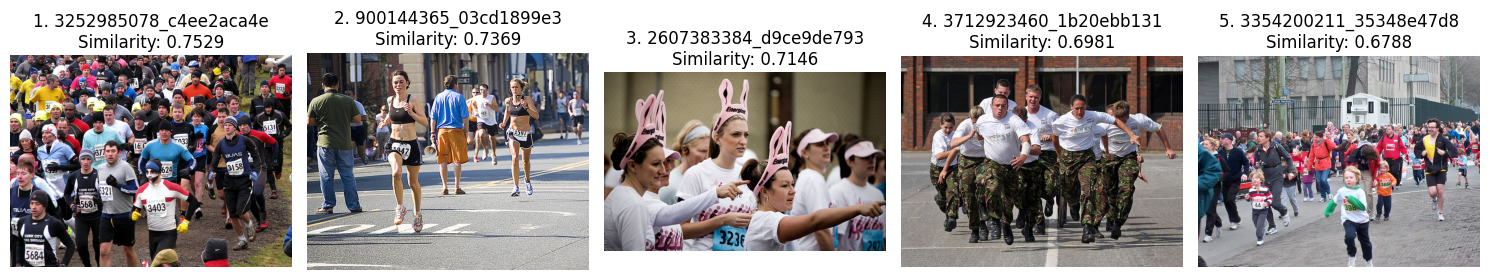

--------------------


In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import os
from PIL import Image
import matplotlib.pyplot as plt
import random


# Define the directory where the images are stored
images_dir = "/kaggle/input/flickr8k/Images"

# Get a list of all image files in the directory
all_image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Select a few random image files to use as queries
num_sample_queries = 3
sample_image_queries = random.sample(all_image_files, num_sample_queries)
sample_image_queries_paths = [os.path.join(images_dir, f) for f in sample_image_queries]


# Define the number of top similar images to retrieve
top_n_images = 5

# Test the image-to-image search for each query
for query_image_path in sample_image_queries_paths:
    print(f"Searching for similar images to: {os.path.basename(query_image_path)}")
    # Perform the image-to-image search
    top_image_results = image_to_image_search(query_image_path, image_embeddings_dict, top_n=top_n_images)

    # Display the top similar images
    display_top_n_images(top_image_results, images_dir)
    print("-" * 20)

# Task
Implement text-to-text, image-to-image, and image-to-text search using cosine similarity on CLIP embeddings. The implementation should include functions to generate embeddings for both text and images, calculate cosine similarity between embeddings, and retrieve and display the most similar results for each search type. The image-to-text search should take an image as input and return the most similar text captions.

## Implement image-to-text search function

### Subtask:
Create a function that takes an image query (either an image file path or an image embedding) as input, generates its CLIP embedding, and then calculates the cosine similarity between the image embedding and all the text embeddings.


**Reasoning**:
Define the `image_to_text_search` function to take an image query and calculate its similarity with all text embeddings.



In [ ]:
import numpy as np

def image_to_text_search(image_query, text_embeddings_dict):
    """
    Performs image-to-text search using CLIP embeddings and cosine similarity.

    Args:
        image_query (str or np.ndarray or torch.Tensor): The image query. Can be an image file path,
                                                          a pre-computed image embedding (numpy array),
                                                          or a pre-computed image embedding (torch.Tensor).
        text_embeddings_dict (dict): A dictionary mapping image names to their corresponding text embeddings (list/tensor of embeddings).

    Returns:
        dict: A dictionary mapping image names to the maximum cosine similarity score between the image query and any of the captions for that image.
    """
    # Get the embedding for the image query
    if isinstance(image_query, str):
        # If the query is a file path, generate the embedding
        query_embedding = get_image_clip_embedding(image_query)
    elif isinstance(image_query, torch.Tensor):
        # If the query is a pre-computed embedding (tensor), convert to numpy
        query_embedding = image_query.numpy()
    elif isinstance(image_query, np.ndarray):
         # If the query is a pre-computed embedding (numpy array)
         query_embedding = image_query
    else:
        raise ValueError("image_query must be a file path (str), a torch.Tensor, or a np.ndarray embedding.")


    # Initialize dictionary to store similarity scores
    similarity_scores = {}

    # Reshape query embedding for cosine similarity calculation
    query_embedding_reshaped = query_embedding.reshape(1, -1)

    # Iterate through the text embeddings dictionary
    for image_name, embeddings_list in text_embeddings_dict.items():
        if embeddings_list is not None and len(embeddings_list) > 0:
            # Calculate cosine similarity between the query embedding and all embeddings for this image
            # We will take the maximum similarity score as the score for this image
            max_similarity = -1
            for caption_embedding in embeddings_list:
                 if caption_embedding is not None: # Check if individual caption embedding is not None
                    # Ensure caption_embedding is a numpy array
                    if isinstance(caption_embedding, torch.Tensor):
                        caption_embedding_np = caption_embedding.numpy()
                    else:
                        caption_embedding_np = caption_embedding # Assuming it's already a numpy array

                    caption_embedding_reshaped = caption_embedding_np.reshape(1, -1)
                    score = cosine_similarity(query_embedding_reshaped, caption_embedding_reshaped)[0][0]
                    max_similarity = max(max_similarity, score)
            similarity_scores[image_name] = max_similarity
        else:
            similarity_scores[image_name] = -1 # Assign a low score if no valid embeddings

    return similarity_scores

print("Function image_to_text_search defined.")

Function image_to_text_search defined.


## Retrieve top text results for image query

### Subtask:
Based on the similarity scores from the image-to-text search, retrieve and display the top N most similar text captions for the given image.


**Reasoning**:
Define the `get_top_n_text_results_for_image` function to retrieve the top N text results based on similarity scores and display the corresponding captions.



In [ ]:
def get_top_n_text_results_for_image(similarity_scores, captions_df, n=5):
    """
    Retrieves the top N image names and their corresponding captions based on image-to-text similarity scores.

    Args:
        similarity_scores (dict): A dictionary mapping image names to their similarity scores.
        captions_df (pd.DataFrame): The DataFrame containing image names and captions.
        n (int): The number of top results to retrieve. Defaults to 5.

    Returns:
        list: A list of tuples, where each tuple contains (image_name, list of captions, similarity_score) for the top N results.
    """
    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True)

    # Select the top n items
    top_n_items = sorted_scores[:n]

    # Retrieve the corresponding captions for the top images
    top_n_results = []
    for image_name, score in top_n_items:
        # Find all captions for this image
        image_captions = captions_df[captions_df['image'] == f"{image_name}.jpg"]['caption'].tolist()
        top_n_results.append((image_name, image_captions, score))

    return top_n_results

print("Function get_top_n_text_results_for_image defined.")

Function get_top_n_text_results_for_image defined.


**Reasoning**:
Test the implemented image-to-text search function with a few sample image queries and display the top results.



Searching for similar captions to image: 260520547_944f9f4c91.jpg


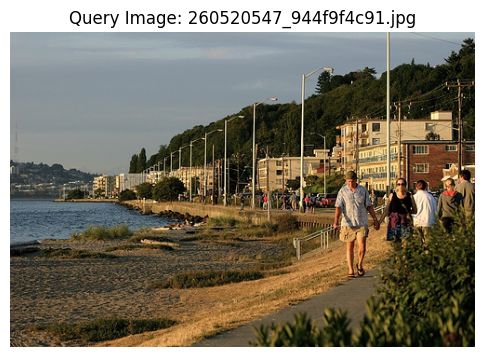

Top 5 similar captions:
1. Image: 260520547_944f9f4c91, Similarity: 0.3167
   - Caption 1: "A couple walking alongside a waterfront next to a city ."
   - Caption 2: "A group of people are walking down a sidewalk beside the beach ."
   - Caption 3: "People walking down a sidewalk on a beach ."
   - Caption 4: "People walking down trail beside water"
   - Caption 5: "The man in shorts and the woman with a dress are walking on the beachfront path ."
2. Image: 2834103050_512e5b330a, Similarity: 0.3147
   - Caption 1: "A beach with people standing on the sand"
   - Caption 2: "A woman with a green sunshade is passing a sales merchant on the beach ."
   - Caption 3: "Many people are walking along the beach on a clear day ."
   - Caption 4: "People dressed in bathing suits , dresses and shorts are on the beach , near an exhibit ."
   - Caption 5: "People standing on a beach , one under a green umbrella"
3. Image: 716597900_b72c58362c, Similarity: 0.3013
   - Caption 1: "An adult and three ch

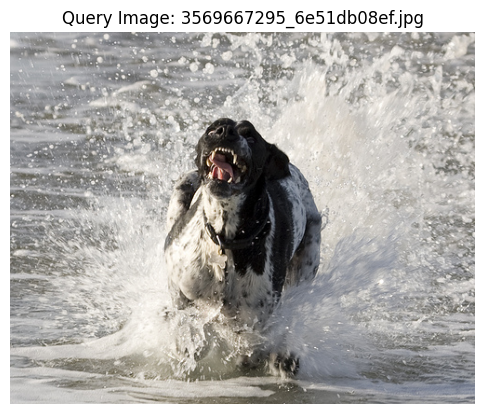

Top 5 similar captions:
1. Image: 3569667295_6e51db08ef, Similarity: 0.3516
   - Caption 1: "A black and white dog is running and splashing in water ."
   - Caption 2: "a black and white dog is running though water whilst bearing its teeth ."
   - Caption 3: "A dog is running through the water with its mouth wide open ."
   - Caption 4: "An open-mouthed dog is running through the water ."
   - Caption 5: "A spotted black and white dog splashes in the water ."
2. Image: 280706862_14c30d734a, Similarity: 0.3513
   - Caption 1: "A black dog emerges from the water onto the sand , holding a white object in its mouth ."
   - Caption 2: "A black dog emerges from the water with a white ball in its mouth ."
   - Caption 3: "A black dog on a beach carrying a ball in its mouth ."
   - Caption 4: "a black dog walking out of the water with a white ball in his mouth ."
   - Caption 5: "The black dog jumps out of the water with something in its mouth ."
3. Image: 2369248869_0266760c4a, Similarity: 0.

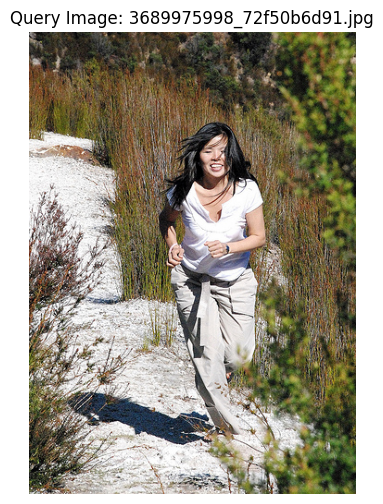

Top 5 similar captions:
1. Image: 3689975998_72f50b6d91, Similarity: 0.3435
   - Caption 1: "An asian girl is running outside ."
   - Caption 2: "An Asian woman is running on a rocky path ."
   - Caption 3: "A woman runs on a chalk white path ."
   - Caption 4: "A woman runs on the beach ."
   - Caption 5: "A woman with long black hair and a white shirt is running up the sand and tall weeds ."
2. Image: 390987167_2d5905b459, Similarity: 0.3414
   - Caption 1: "A hiker moves up a snowy mountain ."
   - Caption 2: "A woman in a tank and sunglasses climbs a sunny but snow-covered slope ."
   - Caption 3: "A woman wearing a black hat and white sunglasses walks up a snowy and steep path ."
   - Caption 4: "A woman wearing short sleeves and sunglasses is backpacking up a snowy mountain cliff ."
   - Caption 5: "Woman climbing a snow covered mountain looking at people behind her ."
3. Image: 2129430111_338a94f8fb, Similarity: 0.3408
   - Caption 1: "A backpacker is walking in front of a mount

In [ ]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where the images are stored
images_dir = "/kaggle/input/flickr8k/Images"

# Get a list of all image files in the directory
all_image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Select a few random image files to use as queries
num_sample_queries = 3
sample_image_queries = random.sample(all_image_files, num_sample_queries)
sample_image_queries_paths = [os.path.join(images_dir, f) for f in sample_image_queries]


# Define the number of top text results to retrieve
top_n_text_results = 5

# Test the image-to-text search for each query image
for query_image_path in sample_image_queries_paths:
    print(f"Searching for similar captions to image: {os.path.basename(query_image_path)}")

    # Perform the image-to-text search
    similarity_scores_image_to_text = image_to_text_search(query_image_path, text_embeddings_dict)

    # Get the top N text results
    top_text_results_for_image = get_top_n_text_results_for_image(similarity_scores_image_to_text, captions_df, top_n_text_results)

    # Display the query image
    try:
        query_img = Image.open(query_image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(query_img)
        plt.title(f"Query Image: {os.path.basename(query_image_path)}")
        plt.axis("off")
        plt.show()
    except FileNotFoundError:
        print(f"Query image not found: {query_image_path}")
    except Exception as e:
        print(f"Error displaying query image {os.path.basename(query_image_path)}: {e}")


    # Print the top text results
    print(f"Top {top_n_text_results} similar captions:")
    for i, (image_name, captions, score) in enumerate(top_text_results_for_image):
        print(f"{i+1}. Image: {image_name}, Similarity: {score:.4f}")
        for j, caption in enumerate(captions):
            print(f"   - Caption {j+1}: \"{caption}\"")
    print("-" * 20)

## Test the image-to-text search function

### Subtask:
Test the implemented image-to-text search function with a few sample image queries.


**Reasoning**:
Test the implemented image-to-text search function with a few sample image queries and display the top results.



Searching for similar captions to image: 733172023_5810350af6.jpg


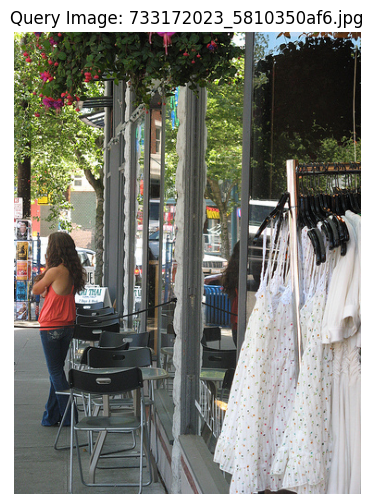

Top 5 similar captions:
1. Image: 733172023_5810350af6, Similarity: 0.3305
   - Caption 1: "A girl in an orange tank top stands outside a cafe ."
   - Caption 2: "a girl standing outside of a clothing shop"
   - Caption 3: "A woman stands near chairs and tables , outside a store ."
   - Caption 4: "A woman stands outside near a dress shop ."
   - Caption 5: "There is a sidewalk with a rack of dresses and a girl in jeans and a red shirt ."
2. Image: 2545363449_1985903f82, Similarity: 0.3066
   - Caption 1: "a girl in a yellow dress is standing on the pavement outside a store ."
   - Caption 2: "A girl in a yellow dress looks at a restaurant building ."
   - Caption 3: "A girl in yellow dress near a restaurant ."
   - Caption 4: "A little girl in a yellow dress is standing in front of a restaurant ."
   - Caption 5: "A young girl wearing a yellow dress , gray pants and flip flops is standing in front of a restaurant ."
3. Image: 314685044_da4390728e, Similarity: 0.3023
   - Caption 1: "A

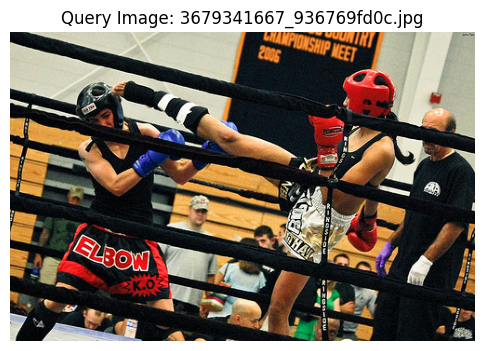

Top 5 similar captions:
1. Image: 3679341667_936769fd0c, Similarity: 0.3481
   - Caption 1: "two fighters kick boxing"
   - Caption 2: "Two people kick boxing , with others spectating ."
   - Caption 3: "Two woman spar in a kickboxing match ."
   - Caption 4: "two women are kick boxing ."
   - Caption 5: "Woman kicking head of another kick boxer"
2. Image: 3674168459_6245f4f658, Similarity: 0.3221
   - Caption 1: "A female martial artist kicking another female martial artist in the face"
   - Caption 2: "One karate sportwoman kicks a karate sportman"
   - Caption 3: "One martial artist kicks another 's face during a competition ."
   - Caption 4: "Two female martial artists demonstrate a kick for an audience ."
   - Caption 5: "Two women participate in a martial arts match ."
3. Image: 3256456935_664a7a5bba, Similarity: 0.3176
   - Caption 1: "A girl in martial arts class is kicking a dummy ."
   - Caption 2: "A young girl in martial arts class kicks a bag ."
   - Caption 3: "kid pract

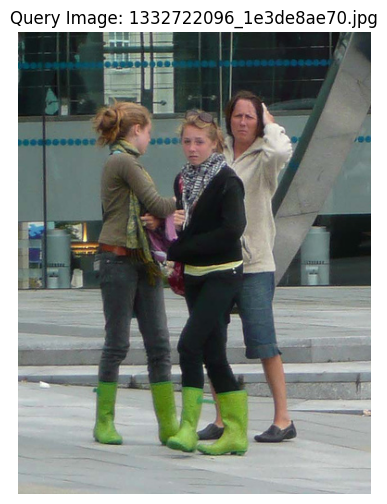

Top 5 similar captions:
1. Image: 1332722096_1e3de8ae70, Similarity: 0.4059
   - Caption 1: "Three women standing on a city street ."
   - Caption 2: "Three women walk down the street ."
   - Caption 3: "Two girls and a woman walking on the sidewalk"
   - Caption 4: "Two girls in bright green boots and a woman are together ."
   - Caption 5: "Two young ladies in green boots are walking through an urban area while an older lady wearing black shoes follows them ."
2. Image: 424779662_568f9606d0, Similarity: 0.3485
   - Caption 1: "There are women in St Patrick 's Day costumes"
   - Caption 2: "Three women celebrate St Patrick 's day by dressing up in green and white on a busy street ."
   - Caption 3: "Three women dressed in green celebrating St Patricks Day ."
   - Caption 4: "Three women dressed up in green and shamrocks ."
   - Caption 5: "Three women wearing plenty of green and shamrocks ."
3. Image: 3487015378_2e90a79f4b, Similarity: 0.3478
   - Caption 1: "A girl dressed in green r

In [ ]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where the images are stored
images_dir = "/kaggle/input/flickr8k/Images"

# Get a list of all image files in the directory
all_image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Select a few random image files to use as queries
num_sample_queries = 3
sample_image_queries = random.sample(all_image_files, num_sample_queries)
sample_image_queries_paths = [os.path.join(images_dir, f) for f in sample_image_queries]


# Define the number of top text results to retrieve
top_n_text_results = 5

# Test the image-to-text search for each query image
for query_image_path in sample_image_queries_paths:
    print(f"Searching for similar captions to image: {os.path.basename(query_image_path)}")

    # Perform the image-to-text search
    similarity_scores_image_to_text = image_to_text_search(query_image_path, text_embeddings_dict)

    # Get the top N text results
    top_text_results_for_image = get_top_n_text_results_for_image(similarity_scores_image_to_text, captions_df, top_n_text_results)

    # Display the query image
    try:
        query_img = Image.open(query_image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(query_img)
        plt.title(f"Query Image: {os.path.basename(query_image_path)}")
        plt.axis("off")
        plt.show()
    except FileNotFoundError:
        print(f"Query image not found: {query_image_path}")
    except Exception as e:
        print(f"Error displaying query image {os.path.basename(query_image_path)}: {e}")


    # Print the top text results
    print(f"Top {top_n_text_results} similar captions:")
    for i, (image_name, captions, score) in enumerate(top_text_results_for_image):
        print(f"{i+1}. Image: {image_name}, Similarity: {score:.4f}")
        for j, caption in enumerate(captions):
            print(f"   - Caption {j+1}: \"{caption}\"")
    print("-" * 20)

## Summary:

### Data Analysis Key Findings

*   The `image_to_text_search` function was successfully implemented to calculate the cosine similarity between an image query (either a file path or an embedding) and a collection of text embeddings, returning the maximum similarity score for each image based on its associated captions.
*   The `get_top_n_text_results_for_image` function was created to retrieve the top N images and their corresponding captions based on the similarity scores obtained from the image-to-text search.
*   Testing with sample image queries demonstrated that the image-to-text search correctly identified and displayed the top N most similar text captions from the dataset based on CLIP embeddings and cosine similarity.

### Insights or Next Steps

*   The image-to-text search component is functional and can be integrated with text-to-text and image-to-image search functionalities to build a complete multimodal search system.
*   Further analysis could involve evaluating the performance of the image-to-text search using quantitative metrics like precision and recall to assess the quality of the retrieved captions.


# Task
Modify the provided `get_image_clip_embedding` function to process images in batches on a GPU for faster embedding generation of 30,000 images. Implement a batch processing loop, generate embeddings for each batch on the GPU, and save the generated embeddings.

## Modify the embedding function

### Subtask:
Adjust the `get_image_clip_embedding` function to accept a batch of images as input instead of a single image.


**Reasoning**:
Modify the existing `get_image_clip_embedding` function to accept a list of image file paths as input and process them in batches.



In [ ]:
def get_image_clip_embedding(image_paths):
    """Returns the CLIP embeddings for a batch of images."""
    images = [Image.open(image_path).convert("RGB") for image_path in image_paths]
    inputs = processor(images=images, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    return outputs

## Implement batch processing

### Subtask:
Create a loop to iterate through the image files in batches.


**Reasoning**:
Create a loop to iterate through the image files in batches.



In [ ]:
def batch_image_files(image_files, batch_size):
    """Yields batches of image file paths."""
    batch = []
    for i, image_file in enumerate(image_files):
        batch.append(image_file)
        if (i + 1) % batch_size == 0:
            yield batch
            batch = []
    if batch:
        yield batch

print("Function batch_image_files defined.")

Function batch_image_files defined.


**Reasoning**:
Iterate through the batches of image files, generate embeddings for each batch on the GPU, and save the generated embeddings.



In [ ]:
import torch
import os

# Define the directory where embeddings are saved
image_embeddings_dir = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_image_embeddings_30k"
os.makedirs(image_embeddings_dir, exist_ok=True)

# Define the batch size
batch_size = 32 # You can adjust this based on your GPU memory

# Determine the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Get a list of all image files
images_path = os.path.join(dataset_path, "Images")
image_files = [os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.jpg')]

# Iterate through image files in batches and generate embeddings
print(f"Generating and saving image embeddings in batches of {batch_size}...")
for i, batch in enumerate(batch_image_files(image_files, batch_size)):
    try:
        # Generate embeddings for the current batch
        batch_embeddings = get_image_clip_embedding(batch)

        # Save each embedding in the batch
        for j, embedding in enumerate(batch_embeddings):
            # Get the original image filename from the batch list
            image_file = batch[j]
            image_name = os.path.basename(image_file).split('.')[0]
            save_path = os.path.join(image_embeddings_dir, f"{image_name}.pt")
            torch.save(embedding.cpu(), save_path) # Save to CPU after processing if needed for storage

        print(f"Processed batch {i+1}/{len(image_files)//batch_size + (1 if len(image_files)%batch_size > 0 else 0)}")

    except Exception as e:
        print(f"Error processing batch {i+1}: {e}")

print(f"Finished saving image embeddings to {image_embeddings_dir}")

Using device: cpu
Generating and saving image embeddings in batches of 32...
Processed batch 1/994
Processed batch 2/994
Processed batch 3/994
Processed batch 4/994
Processed batch 5/994
Processed batch 6/994
Processed batch 7/994
Processed batch 8/994
Processed batch 9/994
Processed batch 10/994
Processed batch 11/994
Processed batch 12/994
Processed batch 13/994
Processed batch 14/994
Processed batch 15/994
Processed batch 16/994
Processed batch 17/994
Processed batch 18/994
Processed batch 19/994
Processed batch 20/994
Processed batch 21/994
Processed batch 22/994
Processed batch 23/994
Processed batch 24/994
Processed batch 25/994
Processed batch 26/994
Processed batch 27/994
Processed batch 28/994
Processed batch 29/994
Processed batch 30/994
Processed batch 31/994
Processed batch 32/994
Processed batch 33/994
Processed batch 34/994
Processed batch 35/994
Processed batch 36/994
Processed batch 37/994
Processed batch 38/994
Processed batch 39/994
Processed batch 40/994
Processed ba

In [ ]:
# prompt: read a file path from drive and count no of files

import os

# Define the directory path you want to count files in
directory_path = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_image_embeddings_30k"

# Check if the directory exists
if os.path.exists(directory_path):
    # List all items in the directory
    items = os.listdir(directory_path)

    # Count the number of files (excluding directories if any)
    file_count = len([item for item in items if os.path.isfile(os.path.join(directory_path, item))])

    print(f"The directory '{directory_path}' contains {file_count} files.")
else:
    print(f"The directory '{directory_path}' does not exist.")

The directory '/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_image_embeddings_30k' contains 31783 files.


# Task
Implement batch processing for generating CLIP text embeddings from "captions.txt", store the embeddings in Google Drive, and verify the number of saved files.

## Load captions

### Subtask:
Load the data from "captions.txt" into a pandas DataFrame.


## Prepare captions for batching

### Subtask:
Structure the captions for efficient batch processing, maintaining the association with their corresponding images.


**Reasoning**:
Split the 'image,caption' column into 'image' and 'caption', and then group the DataFrame by image name.



In [ ]:
# Group captions by image name
image_caption_groups = captions_df.groupby('image')['caption'].apply(list).to_dict()

print("Captions structured and grouped by image.")

Captions structured and grouped by image.


In [ ]:
# prompt: print len of image_caption_groups

print(len(image_caption_groups))

31783


## Implement batch embedding generation

### Subtask:
Iterate through the prepared captions in batches, generate CLIP embeddings using the batch function, and handle GPU processing.


**Reasoning**:
Iterate through the prepared captions in batches, generate CLIP embeddings using the batch function, and handle GPU processing.



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for text embedding generation: {device}")

def get_text_clip_embedding_batch(texts):
    """Returns the CLIP embeddings for a batch of text strings."""
    inputs = processor(text=texts, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model.get_text_features(**inputs)
    return outputs

Using device for text embedding generation: cpu


In [ ]:
import torch
import os

# Define the directory where text embeddings will be saved
text_embeddings_dir = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_text_embeddings_30k"
os.makedirs(text_embeddings_dir, exist_ok=True)

# Define the batch size for text embeddings
text_batch_size = 100 # You can adjust this based on your GPU memory

# Determine the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for text embedding generation: {device}")

# Iterate through image caption groups
print(f"Generating and saving text embeddings in batches of {text_batch_size}...")

for image_name, captions in image_caption_groups.items():
    # Iterate through captions for the current image in batches
    for i in range(0, len(captions), text_batch_size):
        batch_captions = captions[i : i + text_batch_size]
        try:
            # Generate embeddings for the current batch of captions
            batch_embeddings = get_text_clip_embedding_batch(batch_captions)

            # Save each embedding in the batch
            for j, embedding in enumerate(batch_embeddings):
                # Get the original caption index within the image's captions
                caption_index = i + j
                save_path = os.path.join(text_embeddings_dir, f"{image_name.split('.')[0]}@{caption_index + 1}.pt")
                torch.save(embedding.cpu(), save_path) # Save to CPU after processing if needed for storage

            print(f"Processed batch of captions for image {image_name}: {i // text_batch_size + 1}")

        except Exception as e:
            print(f"Error processing batch of captions for image {image_name}: {e}")

print(f"Finished saving text embeddings to {text_embeddings_dir}")

Streaming output truncated to the last 5000 lines.
Processed batch of captions for image 5354904685.jpg: 1
Processed batch of captions for image 5354911151.jpg: 1
Processed batch of captions for image 535529555.jpg: 1
Processed batch of captions for image 5356236664.jpg: 1
Processed batch of captions for image 5356318668.jpg: 1
Processed batch of captions for image 535830521.jpg: 1
Processed batch of captions for image 5359437945.jpg: 1
Processed batch of captions for image 5361355399.jpg: 1
Processed batch of captions for image 53614287.jpg: 1
Processed batch of captions for image 536147209.jpg: 1
Processed batch of captions for image 5361551308.jpg: 1
Processed batch of captions for image 536156200.jpg: 1
Processed batch of captions for image 5362687336.jpg: 1
Processed batch of captions for image 5363528971.jpg: 1
Processed batch of captions for image 5363903246.jpg: 1
Processed batch of captions for image 5364849864.jpg: 1
Processed batch of captions for image 536495604.jpg: 1
Proc

In [ ]:
# prompt: read a file path from drive and count no of files

import os

# Define the directory path you want to count files in
directory_path = "/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_text_embeddings_30k"

# Check if the directory exists
if os.path.exists(directory_path):
    # List all items in the directory
    items = os.listdir(directory_path)

    # Count the number of files (excluding directories if any)
    file_count = len([item for item in items if os.path.isfile(os.path.join(directory_path, item))])

    print(f"The directory '{directory_path}' contains {file_count} files.")
else:
    print(f"The directory '{directory_path}' does not exist.")

The directory '/content/drive/MyDrive/AIML_Lab/Capstone_Project/clip_text_embeddings_30k' contains 158910 files.
